In [1]:
import numpy as np
import pandas as pd
import xlrd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
file = 'Folds5x2_pp.xlsx'

In [4]:
xl = pd.ExcelFile(file)

In [5]:
df = xl.parse('Sheet1')

In [6]:
df.columns = ['temp','vacuum','pressure','humidity','output']

In [7]:
df.head()

,temp,vacuum,pressure,humidity,output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
df.shape

(9568, 5)

# Univariate analysis

Temp

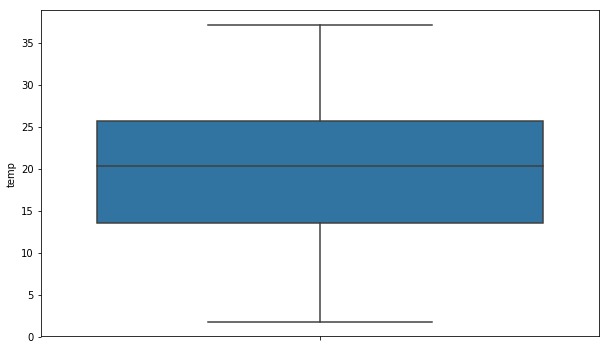

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(df['temp'],orient='v')

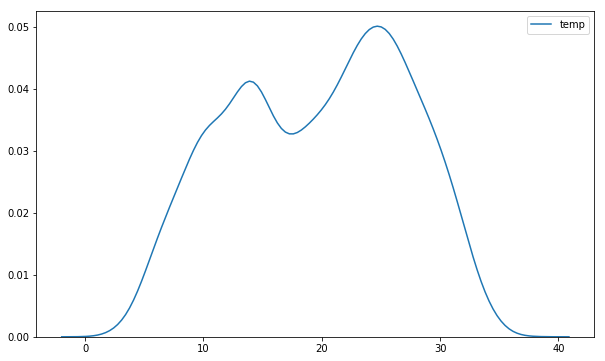

In [10]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['temp'])

In [11]:
#inferences:
#an avg ambient var temperature is 19 degree celsius.
#median variable temperature is 20 degree celsius.
#minimum and max temperature is 1 and 37 degree celsius respectively.
#it does not follows a normal distribution and also shows no presence of outliers.
#it is roughly symetrical around median. i.e. max-med = 17 and med-min=19.

Vacuum

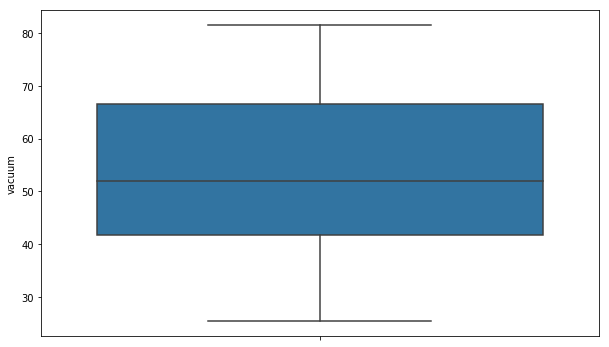

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(df['vacuum'],orient='v')

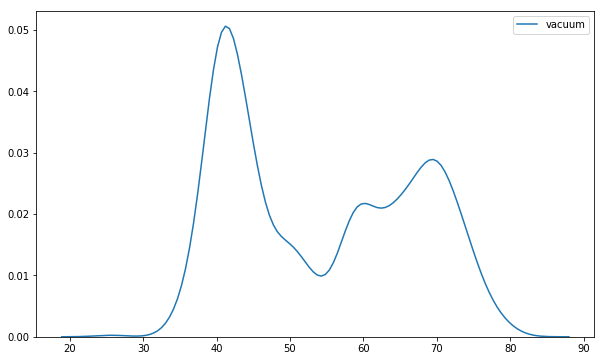

In [13]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['vacuum'])

In [14]:
#inferences:
#an avg vaccum in exhaust is 54 cm-hg whereas median vaccum is 52 cm-HG.
#minimum vaccum in exhaust is 25 cm-hg whereas maximum is 82 cm-hg.
#it does not follows a normal distribution and also shows no presences of outliers.
#it is roughly symmetrical around median i.e. med-min = 27 and max-med = 29.
#it shows a very little left skewed nature.

Pressure

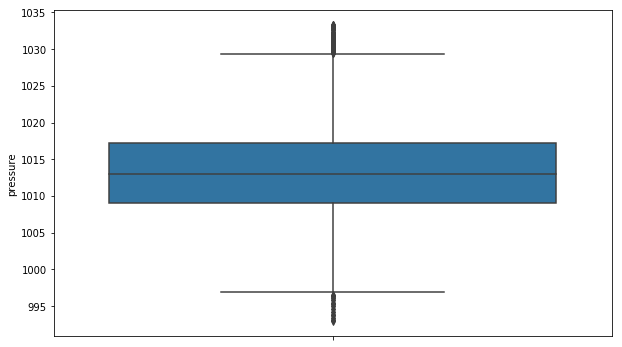

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(df['pressure'],orient='v')

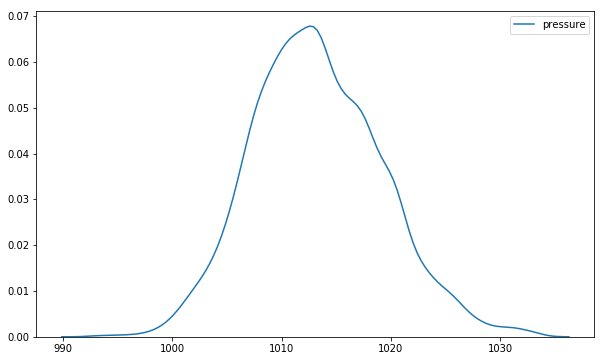

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['pressure'])

In [17]:
#inferences: 
#an avg pressure is 1013 millibar whereas median pressure is 1009 millibar.
#minimum pressure filled is 999 millibar and maximum pressure filled is 1033 millibar.
#it does not follows a normal distribution.
#there are abnormal/outlier values in this variable and thus needs treatment before modelling.
#it is roughly symmetrical around median i.e. med-min = 20 and max-med = 21.
#it shows a very little right skewed nature.

Relative humidity

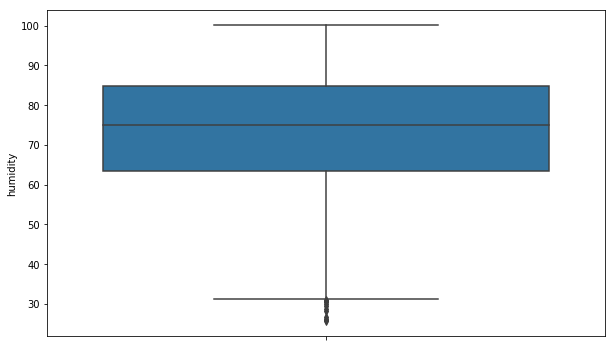

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(df['humidity'],orient='v')

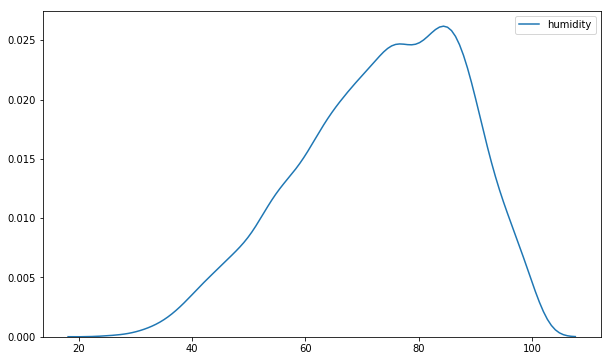

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['humidity'])

In [20]:
#inferences:
#an avg relative humidity is 73 whereas median relative humidity is 75 
#minimum relative humidity is 26 and maximum relative humidity is 100 
#it does not shows normal distribution.
#it shows presences of abnormal.outliers and thus needs treatment before modelling.
#it shows a very little left skewed nature.

Energy output

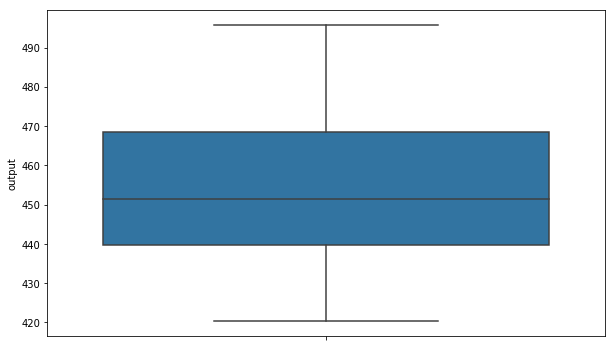

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(df['output'],orient='v')

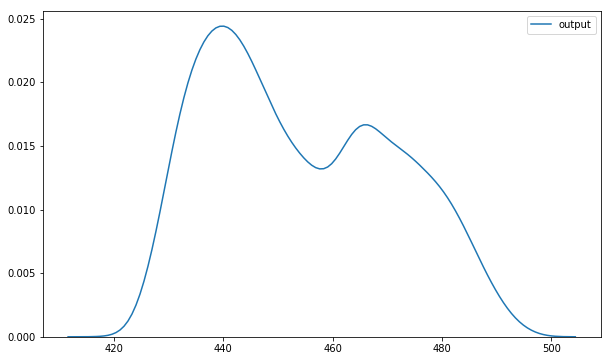

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['output'])

In [23]:
#inferences: 
#an avg energy output is 454 MW whereas median energy output is 451 MW.
#minimum energy output is 420 MW and maximum is 496 MW.
#it does not follows a normal distribution and also does not show presence of abnormal/outlier values.
#it shows nature of left skewed.

# Calculating Spearmanr correlation coefficient

since all the variables are not normally distributed

In [24]:
from scipy.stats import spearmanr

In [25]:
spearmanr(df['humidity'],df['output'])

SpearmanrResult(correlation=0.3896400672775749, pvalue=0.0)

In [26]:
spearmanr(df['temp'],df['output'])

SpearmanrResult(correlation=-0.9444115990524774, pvalue=0.0)

In [27]:
spearmanr(df['vacuum'],df['output'])

SpearmanrResult(correlation=-0.8837015300206702, pvalue=0.0)

In [28]:
spearmanr(df['pressure'],df['output'])

SpearmanrResult(correlation=0.5425312900345103, pvalue=0.0)

# Bivariate Analysis

variable : ambient var temp -> energy output

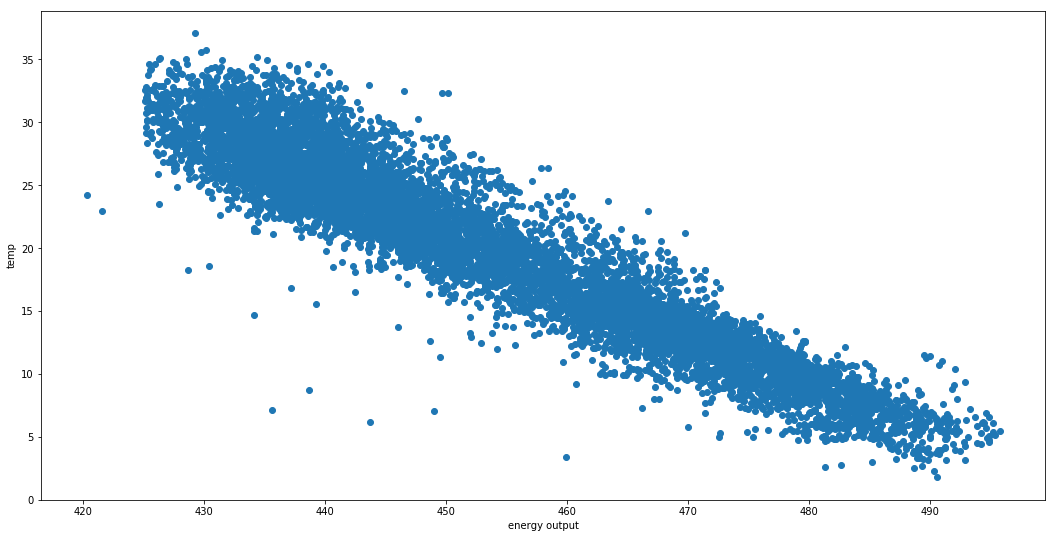

In [29]:
plt.figure(figsize=(18,9))
plt.scatter(df['output'],df['temp'])
plt.ylabel('temp')
plt.xlabel('energy output')
plt.show()
#inferences:
#it shows a strong negative corelation i.e. more output is derived from low variable temperature.
#since they both are not normally distriubted although linearly related pearson coefficient of correlation cannot be used to compare
#hence spearmanr coefficient of correlation = -0.94

variable : exhaust vaccum -> energy output

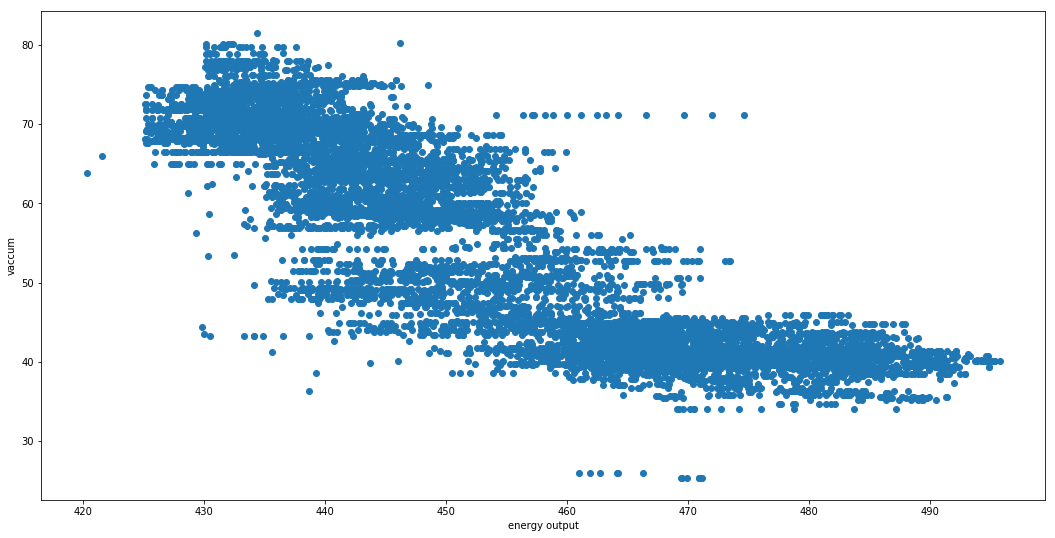

In [30]:
plt.figure(figsize=(18,9))
plt.scatter(df['output'],df['vacuum'])
plt.ylabel('vaccum')
plt.xlabel('energy output')
plt.show()
#inferences: 
#it shows a strong negative corelation i.e. more output is derived when vaccum is less.
#since they both are not normally distriubted and also not linearly related pearson coefficient of correlation cannot be used to compare
#hence spearmanr coefficient of correlation = -0.88

variable : ambient pressure -> energy output

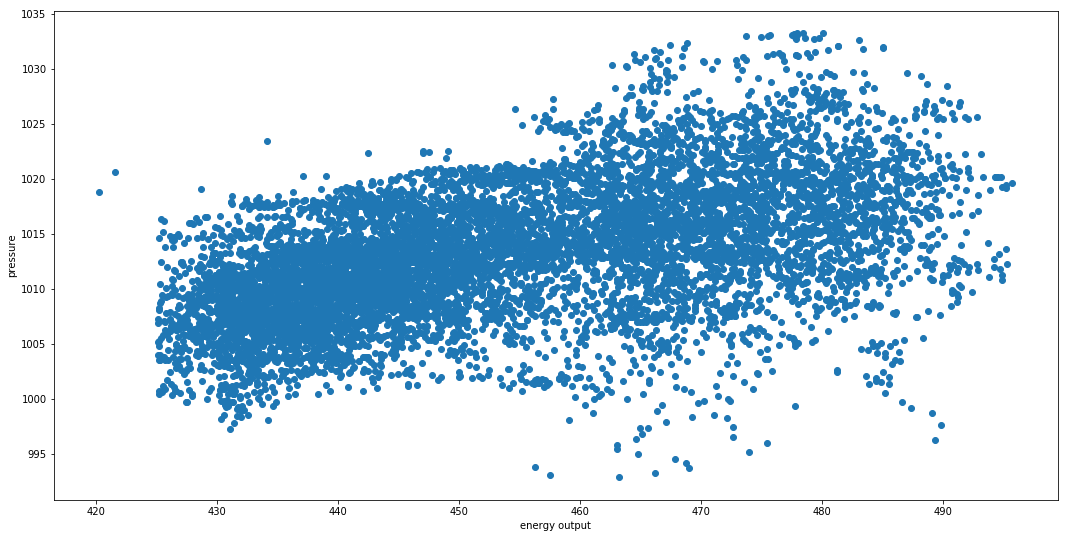

In [31]:
plt.figure(figsize=(18,9))
plt.scatter(df['output'],df['pressure'])
plt.ylabel('pressure')
plt.xlabel('energy output')
plt.show()
#inferences:
#it does not show linear relationship as plot is much more haphazourd.
#since they both are not normally distriubted and also not linearly related pearson coefficient of correlation cannot be used to compare
#hence spearmanr coefficient of correlation = 0.54

variable : relative humidity -> energy output

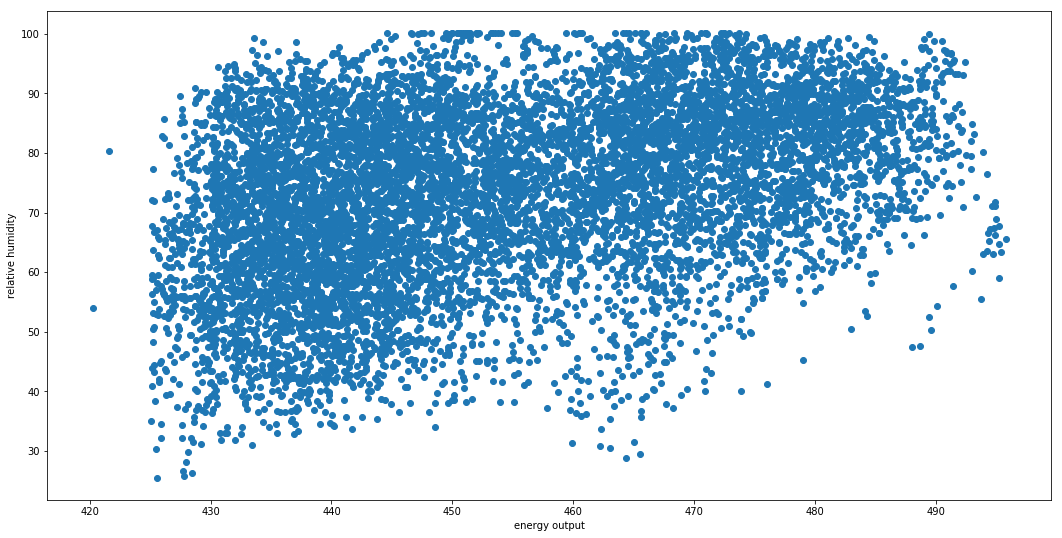

In [32]:
plt.figure(figsize=(18,9))
plt.scatter(df['output'],df['humidity'])
plt.ylabel('relative humidity')
plt.xlabel('energy output')
plt.show()
#inferences:
#it does not show linear relationship as plot is much more haphazourd.
#since they both are not normally distriubted and also not linearly related pearson coefficient of correlation cannot be used to compare
#hence spearmanr coefficient of correlation = 0.39

# Multivariate Analysis

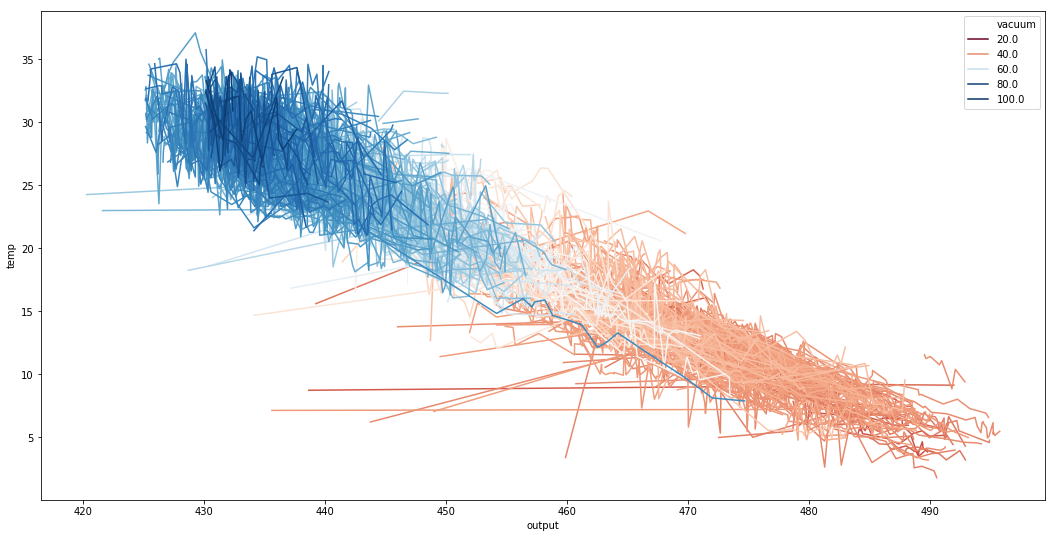

In [33]:
plt.figure(figsize=(18,9))
sns.lineplot(x='output',y='temp',hue='vacuum',data=df,palette='RdBu')
#inferences:
#turbines having low enrgy output have high ambient temp and high exhaust vaccum.
#as energy output increases turbines's abmient temperature and exhaust vaccum decreases.
#hence together they should a negative corelation impact.

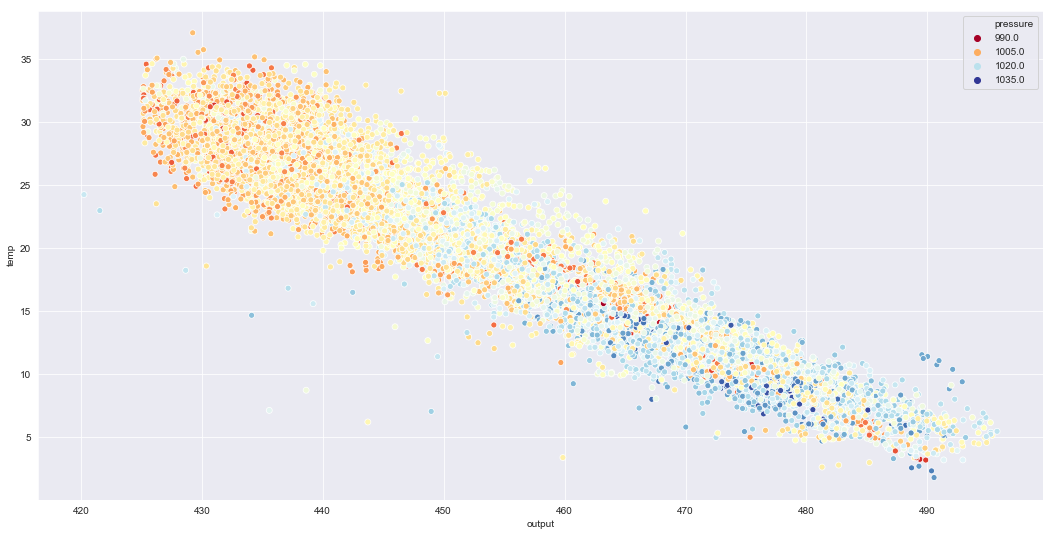

In [34]:
plt.figure(figsize=(18,9))
sns.set_style('darkgrid')
sns.scatterplot(x=df['output'],y=df['temp'],hue=df['pressure'],palette='RdYlBu')
#infereces:
#turbines having energy output till 440 MW have high ambient var temp and ambient pressure of 90-1005 millibar.
#as turbines energy output increases ambient var temp decreases but ambient pressure considerably inc t0 1020-1035 millibar.

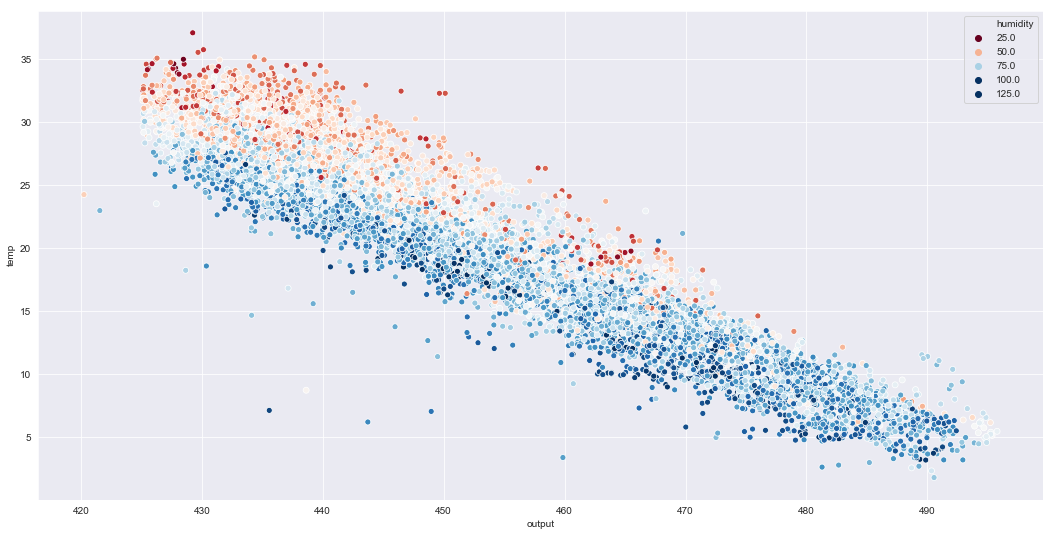

In [35]:
plt.figure(figsize=(18,9))
sns.scatterplot(x=df['output'],y=df['temp'],hue=df['humidity'],palette='RdBu')
#inferences:
#majorly turbines have high i.e. 75-125 relative humidity. 
#less proportion of turbines have humidity less than 75.
#as energy output inc turbines humidity considerably be around 125 wherein abmient temperature be decreasing showing negative effect

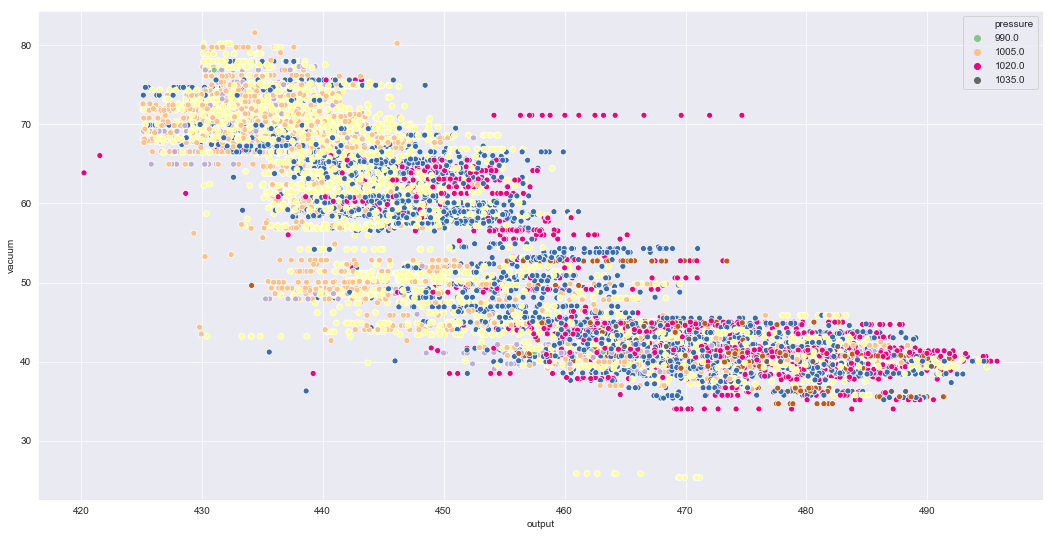

In [36]:
plt.figure(figsize=(18,9))
sns.scatterplot(x=df['output'],y=df['vacuum'],hue=df['pressure'],palette='Accent')
#inferences:
#high energy output turbines (beyond 450MW) having low exhaust vaccum have majorly high ambient pressure (1020-1035 millibar)
#low energy output turbines (below 450MW) having high exhaust vaccum have majorly low abmient pressure.

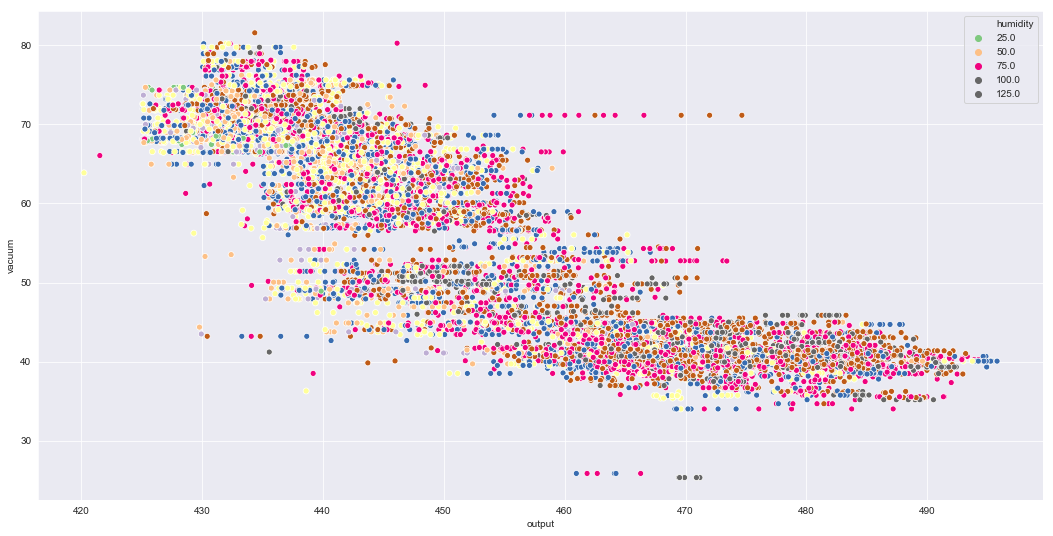

In [37]:
plt.figure(figsize=(18,9))
sns.scatterplot(x=df['output'],y=df['vacuum'],hue=df['humidity'],palette='Accent')
#inferences:
#both low energy output turbines having high vaccum and high energy output having low vaccum : have 75-100 relative humidity.
#very less proportion of turbines have less than 75 humidity.

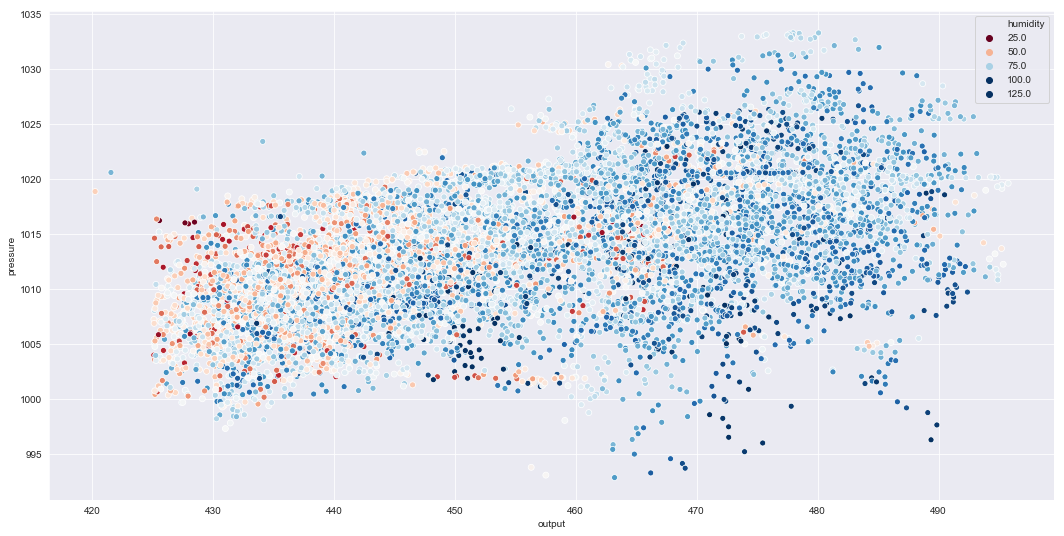

In [38]:
plt.figure(figsize=(18,9))
sns.scatterplot(x=df['output'],y=df['pressure'],hue=df['humidity'],palette='RdBu')
#inferences:
#for low energy output ambient pressure is low and also relative humidity is low.
#as energy output increases ambient pressure and relative humidity considerably increases.
#although together they show positive relationship with energy output but strength of relationship is vagely defined.

# Hypothesis Testing

In [39]:
from scipy.stats import levene,shapiro,f_oneway
from scipy.stats import shapiro,levene,ttest_1samp,ttest_ind,mannwhitneyu,wilcoxon,bartlett,norm
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,wilcoxon,bartlett,chi2_contingency
from statsmodels.stats.power import ttest_power
import scipy.stats as stats

check whether energy output is dependent on ambient var temp.

In [40]:
levene(df['output'],df['temp'])
#unequal variance

LeveneResult(statistic=6788.075265819436, pvalue=0.0)

In [41]:
#h0: energy output is independent of ambient var temp
#h1:dependent

In [42]:
shapiro(df['output'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9553725719451904, 0.0)

In [43]:
shapiro(df['temp'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9707975387573242, 3.716271553358701e-40)

In [44]:
bartlett(df['output'],df['temp'])

BartlettResult(statistic=5930.677610552866, pvalue=0.0)

In [45]:
mannwhitneyu(df['output'],df['temp'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [46]:
#since p value is less than 0.05 we reject h0 and hence energy output is dependent on ambient var temp

check whether energy output is dependent on exhaust vaccum

In [47]:
levene(df['output'],df['vacuum'])
#unequal variance

LeveneResult(statistic=818.1294834347342, pvalue=3.1094624994411214e-176)

In [48]:
#h0 : energy output is independent of exhaust vaccum
#h1: dependent

In [49]:
shapiro(df['vacuum'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9064360857009888, 0.0)

In [50]:
bartlett(df['output'],df['vacuum'])

BartlettResult(statistic=820.3012549821365, pvalue=2.080996146324457e-180)

In [51]:
mannwhitneyu(df['output'],df['vacuum'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [52]:
#since p-value is less 0.05 we reject h0 and hence energy output is dependent on exhaust vaccum.

check whether energy output is dependent on ambient pressure

In [53]:
levene(df['output'],df['pressure'])
#unequl variance

LeveneResult(statistic=10011.033704808016, pvalue=0.0)

In [54]:
#h0 : energy output is independent of ambient pressure
#h1 : dependent

In [55]:
shapiro(df['pressure'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9952636957168579, 3.450737449986645e-17)

In [56]:
bartlett(df['output'],df['pressure'])

BartlettResult(statistic=9122.414820762311, pvalue=0.0)

In [57]:
mannwhitneyu(df['output'],df['pressure'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [58]:
#since p-value is less than 0.05 it shows energy output is dependent on ambient pressure

check whether energy output is dependent on relative humidity

In [59]:
levene(df['output'],df['humidity'])
#unequal variance

LeveneResult(statistic=471.09230422082624, pvalue=3.2535704637068787e-103)

In [60]:
#h0 : energy output is independent of relative humidity
#h1 : dependent

In [61]:
shapiro(df['humidity'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9775609374046326, 3.3726765330225706e-36)

In [62]:
bartlett(df['output'],df['humidity'])

BartlettResult(statistic=232.18770986299964, pvalue=1.9872346287912727e-52)

In [63]:
mannwhitneyu(df['output'],df['humidity'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [64]:
#since p-value is less than 0.05 we reject h0 and hence energy output is dependent on relative humidity.

# Box-Cox transformation

In [65]:
from scipy import stats

Temp

In [66]:
#getting values from temp column
transform1 = np.asarray(df[['temp']].values)

In [67]:
#transforming values
df['temp1'] = stats.boxcox(transform1)[0]

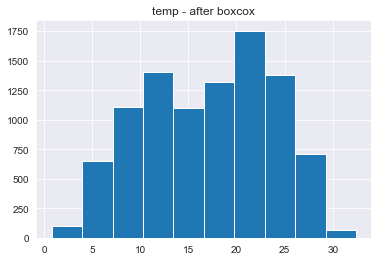

In [68]:
#plotting transformed temp
plt.hist(df['temp1'])
plt.title('temp - after boxcox')
plt.show()

In [69]:
from scipy.stats import shapiro

In [70]:
shapiro(df['temp1'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9705925583839417, 2.8978712112390785e-40)

Vacuum

In [71]:
transform2 = np.asarray(df[['vacuum']].values)

In [72]:
df['vacuum1'] = stats.boxcox(transform2)[0]

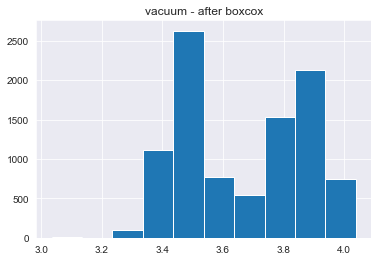

In [73]:
plt.hist(df['vacuum1'])
plt.title('vacuum - after boxcox')
plt.show()

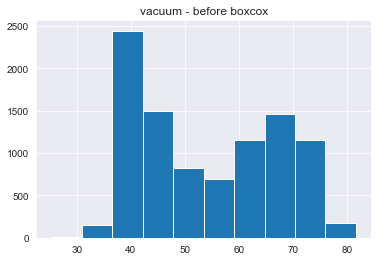

In [74]:
plt.hist(df['vacuum'])
plt.title('vacuum - before boxcox')
plt.show()

In [75]:
shapiro(df['vacuum1'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9108288288116455, 0.0)

Pressure

In [76]:
transform3 = np.asarray(df[['pressure']].values)

In [77]:
df['pressure1'] = stats.boxcox(transform3)[0]

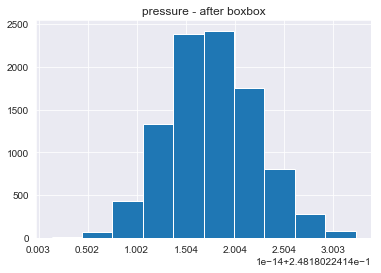

In [78]:
plt.hist(df['pressure1'])
plt.title('pressure - after boxbox')
plt.show()

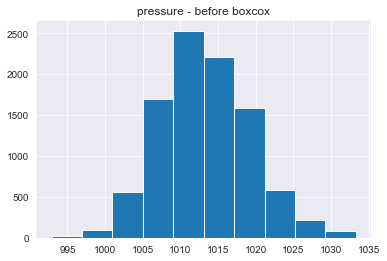

In [79]:
plt.hist(df['pressure'])
plt.title('pressure - before boxcox')
plt.show()

In [80]:
shapiro(df['pressure1'])
#normal after boxcox

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(1.0, 1.0)

In [81]:
shapiro(df['pressure'])
#not normal before boxcox

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9952636957168579, 3.450737449986645e-17)

Relative humidity

In [82]:
transform4 = np.asarray(df[['humidity']].values)

In [83]:
df['humidity1'] = stats.boxcox(transform4)[0]

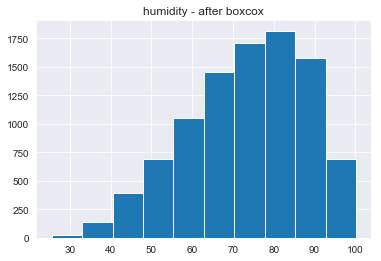

In [84]:
plt.hist(df['humidity'])
plt.title('humidity - after boxcox')
plt.show()

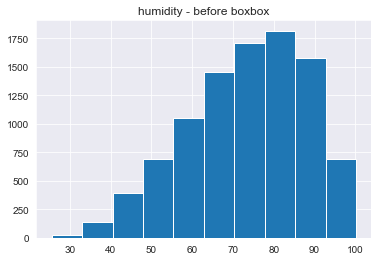

In [85]:
plt.hist(df['humidity'])
plt.title('humidity - before boxbox')
plt.show()

In [86]:
shapiro(df['humidity1'])
#not normal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9870036840438843, 1.1238955579759938e-28)

In [87]:
df.columns

Index(['temp', 'vacuum', 'pressure', 'humidity', 'output', 'temp1', 'vacuum1',
       'pressure1', 'humidity1'],
      dtype='object')

In [88]:
df1 = df[['temp1','vacuum1','pressure1','humidity1','output']]

# Base line model (without transformation)

we first build a regression model with variables which are not applied box cox transformation and
then plot a resuidual plot. if our residual plot shows heteroscedacity then we need to apply
box cox transformation on dependent variable otherwise we dont 

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x1 = df[['temp','vacuum','pressure','humidity']]
y1 = df['output']

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=123)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()

In [94]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
model_predict = model.predict(x_test)

In [96]:
residual = model_predict - y_test

Text(0,0.5,'residual')

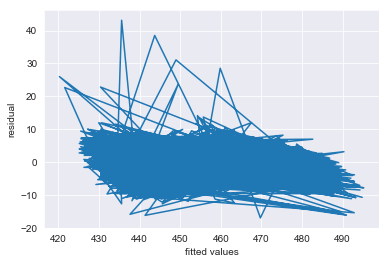

In [97]:
plt.plot(y_test,residual)
plt.xlabel('fitted values')
plt.ylabel('residual')

Since there is no heterscedacity hence we dont need to transform our dependent variable and hence we can proceed with building models based on transformed independent variables and non-transformed dependent variables

# Factor Analysis

In [98]:
x = df1.drop(columns='output')
y = df1['output']

In [99]:
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=4, random_state=101).fit(x)

In [100]:
print(pd.DataFrame(factor.components_,columns=x.columns))

      temp1   vacuum1     pressure1   humidity1
0  3.580747  0.063820 -4.108182e-16 -405.263899
1 -5.505179 -0.164708  2.384776e-15   -0.051063
2 -0.000000  0.000000  0.000000e+00   -0.000000
3 -0.000000  0.000000 -0.000000e+00   -0.000000


In [101]:
factor.components_

array([[ 3.58074706e+00,  6.38198030e-02, -4.10818205e-16,
        -4.05263899e+02],
       [-5.50517897e+00, -1.64708221e-01,  2.38477618e-15,
        -5.10625118e-02],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00]])

In [102]:
X_factor=factor.fit_transform(x)

In [103]:
data=pd.DataFrame(X_factor)
data.head()

,0,1,2,3
0,0.090854,0.818871,0.0,0.0
1,1.010772,-0.253506,0.0,0.0
2,-1.383407,1.405857,0.0,0.0
3,-0.158779,-0.312225,0.0,0.0
4,-1.769577,0.331429,0.0,0.0


Since last 2 components are turning 0 now we need to check for n=2 components!

In [104]:
factor1 = FactorAnalysis(n_components=2, random_state=101).fit(x)

In [105]:
print(pd.DataFrame(factor1.components_,columns=x.columns))

      temp1   vacuum1     pressure1   humidity1
0  3.580762  0.063820 -4.108242e-16 -405.263899
1 -5.505383 -0.165426  2.380966e-15   -0.052170


In [106]:
factor1.components_

array([[ 3.58076223e+00,  6.38203105e-02, -4.10824238e-16,
        -4.05263899e+02],
       [-5.50538304e+00, -1.65425878e-01,  2.38096604e-15,
        -5.21703013e-02]])

In [107]:
X_factor1=factor1.fit_transform(x)

In [108]:
data1=pd.DataFrame(X_factor1)
data1.head()

,0,1
0,0.090851,0.824333
1,1.010773,-0.256870
2,-1.383410,1.400581
3,-0.158778,-0.314459
4,-1.769579,0.341056


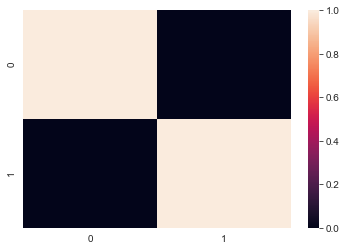

In [109]:
sns.heatmap(data1.corr())

# Train test validation split

In [110]:
del x,y,x_train,y_train,x_test,y_test

In [111]:
x = df1.drop(columns='output')
y = df1['output']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.1, random_state=1)

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Ridge regression

In [113]:
ridge_param = {
    'alpha' : [1,2,3],
    'fit_intercept' : [True,False],
    'normalize' : [True,False],
    'copy_X' : [True,False],
    'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
    'random_state' : [100,123,130]
    }

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [115]:
grid_search = GridSearchCV(estimator=Ridge(),param_grid=ridge_param,cv=5)

In [116]:
rd_grid = grid_search.fit(X_train,y_train)

In [117]:
grid_search.best_params_

{'alpha': 2,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False,
 'random_state': 123,
 'solver': 'sag'}

In [118]:
model1 = Ridge(alpha=2,copy_X=True,fit_intercept=True,normalize=False,random_state=123,solver='sag')

In [119]:
model1.fit(X_train,y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='sag', tol=0.001)

In [120]:
#predicting on validation data
model1_valid = model1.predict(X_val)

In [121]:
from sklearn import metrics

In [122]:
rsquare_model1_valid = metrics.r2_score(model1_valid,y_val) #rsquare on validation data
rsquare_model1_valid

0.9164881128716489

In [123]:
adjrsquare_model1_valid = 1-((1-0.92)*((9568-1)/(9568-5))) #adj rsquare on validation data
adjrsquare_model1_valid

0.9199665376973754

In [124]:
#predicting on test data
model1_test = model1.predict(X_test)

In [125]:
rsquare_model1_test = metrics.r2_score(model1_test,y_test) #rsquare on test data
rsquare_model1_test

0.9222955156145975

In [126]:
adjrsquare_model1_test = 1-((1-0.92)*((9568-1)/(9568-5))) #adj rsquare on test data
adjrsquare_model1_test

0.9199665376973754

In [127]:
#rmse on validation set
rmse_model1_valid = np.sqrt(np.mean((model1_valid-y_val)**2))
rmse_model1_valid

4.748696943368555

In [128]:
#rmse on test set
rmse_model1_test = np.sqrt(np.mean((model1_test-y_test)**2))
rmse_model1_test

4.610079162774211

# Lasso Regression

In [129]:
ls_param = {
    'alpha' : [1,2,3],
    'fit_intercept' : [True,False],
    'normalize':[True,False],
    'precompute' : [True,False],
    'copy_X' : [True,False],
    'random_state' : [100,130,150]
}

In [130]:
from sklearn.linear_model import Lasso

In [131]:
ls_search = GridSearchCV(estimator=Lasso(),param_grid=ls_param,cv=5)

In [132]:
ls_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 2, 3], 'fit_intercept': [True, False], 'normalize': [True, False], 'precompute': [True, False], 'copy_X': [True, False], 'random_state': [100, 130, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
ls_search.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False,
 'precompute': False,
 'random_state': 100}

In [134]:
model2 = Lasso(alpha=1,copy_X=True,fit_intercept=True,normalize=False,precompute=True,random_state=100)

In [135]:
model2.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=True, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False)

In [136]:
#predicting on validation set
model2_valid = model2.predict(X_val)

In [137]:
model2_rsquare_valid = metrics.r2_score(model2_valid,y_val) #rsquare on validation data
model2_rsquare_valid

0.8943123953103325

In [138]:
model2_adj_valid = 1-((1-0.89)*((9568-1)/(9568-5))) #adj rsquare on validation data
model2_adj_valid

0.889953989333891

In [139]:
#predicting on test set
model2_test = model2.predict(X_test)

In [140]:
model2_rsquare_test = metrics.r2_score(model2_test,y_test) #rsquare on test data
model2_rsquare_test

0.8945682930151377

In [141]:
model2_adj_test = 1-((1-0.89)*((9568-1)/(9568-5))) #adj rsquare on test data
model2_adj_test

0.889953989333891

In [142]:
#rmse on validation set
rmse_model2_valid = np.sqrt(np.mean((model2_valid-y_val)**2))
rmse_model2_valid

4.920277136910826

In [143]:
#rmse on test set
rmse_model2_test = np.sqrt(np.mean((model2_test-y_test)**2))
rmse_model2_test

4.9259568567981304

# Elastic Net Regression

In [144]:
er_param = {
    'alpha' : [1,2,3,4],
    'l1_ratio' : [0.2,0.4,0.6,0.8],
    'fit_intercept' : [True,False],
    'normalize' : [True,False],
    'precompute' : [True,False],
    'copy_X' : [True,False],
    'random_state' : [100,130,150]
}

In [145]:
from sklearn.linear_model import ElasticNet

In [146]:
en_search = GridSearchCV(estimator=ElasticNet(),param_grid=er_param,cv=5)

In [147]:
en_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 2, 3, 4], 'l1_ratio': [0.2, 0.4, 0.6, 0.8], 'fit_intercept': [True, False], 'normalize': [True, False], 'precompute': [True, False], 'copy_X': [True, False], 'random_state': [100, 130, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
en_search.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.8,
 'normalize': False,
 'precompute': False,
 'random_state': 100}

In [149]:
model3 = ElasticNet(alpha=1,copy_X=True,fit_intercept=True,l1_ratio=0.8,normalize=False,precompute=True,random_state=100)

In [150]:
model3.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=True,
      random_state=100, selection='cyclic', tol=0.0001, warm_start=False)

In [151]:
#predicting on validation set
model3_valid_pred = model3.predict(X_val)

In [152]:
model3_rsquare_valid = metrics.r2_score(model3_valid_pred,y_val) #rsquare on validation data
model3_rsquare_valid

0.7809366743463986

In [153]:
model3_adj_valid = 1-((1-0.78)*((9568-1)/(9568-5))) #adj rsquare on validation data
model3_adj_valid

0.7799079786677822

In [154]:
#predicting on test set
model3_test_pred = model3.predict(X_test)

In [155]:
model3_rsquare_test = metrics.r2_score(model3_test_pred,y_test) #rsquare on test data
model3_rsquare_test

0.7754947578042913

In [156]:
model3_adj_test = 1-((1-0.78)*((9568-1)/(9568-5))) #adj rsquare on test data
model3_adj_test

0.7799079786677822

In [157]:
#rmse of validation set
rmse_model3_valid = np.sqrt(np.mean((model3_valid_pred-y_val)**2))
rmse_model3_valid

5.977314823383223

In [158]:
#rmse on test set
rmse_model3_test = np.sqrt(np.mean((model3_test_pred-y_test)**2))
rmse_model3_test

6.071043847943059

In [159]:
adj = [adjrsquare_model1_valid,model2_adj_valid,model3_adj_valid]
adjtest = [adjrsquare_model1_test,model2_adj_test,model3_adj_test]
rmse_valid = [rmse_model1_valid,rmse_model2_valid,rmse_model3_valid]
rmse_test =  [rmse_model1_test,rmse_model2_test,rmse_model3_test]
df_factor = pd.DataFrame({"adjusted rsq validation":adj,"adjusted rsq test":adjtest,"rmse valid":rmse_valid,"rmse test":rmse_test})
df_factor.index = ['Ridge','Lasso','ElasticNet']
df_factor

,adjusted rsq validation,adjusted rsq test,rmse valid,rmse test
Ridge,0.919967,0.919967,4.748697,4.610079
Lasso,0.889954,0.889954,4.920277,4.925957
ElasticNet,0.779908,0.779908,5.977315,6.071044


# Incremental PCA

In [160]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [161]:
df_pca = pca_final.fit_transform(df1)
df_pca.shape

(9568, 4)

In [162]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

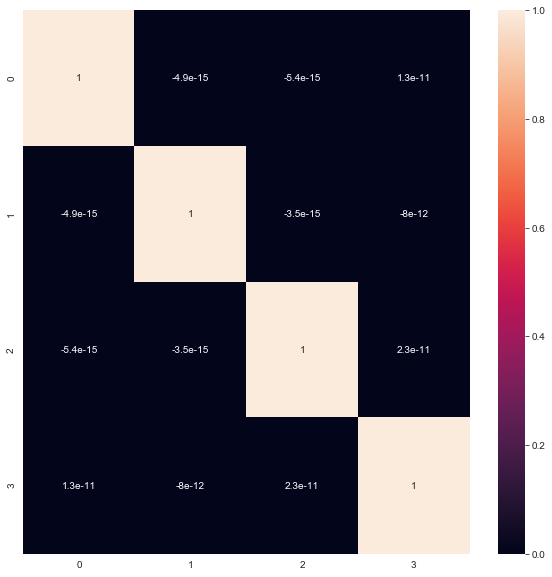

In [163]:
#plotting the correlation matrix
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(corrmat,annot = True)

In [164]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.2747147976621178e-11 , min corr:  -8.004513041185375e-12


We can observe that there is almost no or very little correlation between the PCA components. We have effectively removed multicollinearity from the data using PCA

In [165]:
df_pca1=pd.DataFrame(df_pca)

In [166]:
df_pca1.head()

,0,1,2,3
0,-36.673330,10.432757,-1.141794,-0.093574
1,-409.755512,-3.520073,0.186898,0.049235
2,561.153550,26.288959,0.361784,0.096732
3,64.213334,-9.007650,-1.293624,0.001154
4,717.399635,7.838519,1.064392,-0.110939


In [167]:
y = df1['output']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df_pca1, y, test_size=0.1, random_state=1)

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Ridge Regression

In [169]:
ridge_param1 = {
    'alpha' : [1,2,3],
    'fit_intercept' : [True,False],
    'normalize' : [True,False],
    'copy_X' : [True,False],
    'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
    'random_state' : [100,123,130]
    }

In [170]:
grid_search1 = GridSearchCV(estimator=Ridge(),param_grid=ridge_param1,cv=5)

In [171]:
rd_grid1 = grid_search1.fit(X_train,y_train)

In [172]:
rd_grid1.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False,
 'random_state': 100,
 'solver': 'auto'}

In [173]:
model4 = Ridge(alpha=1,copy_X=True,fit_intercept=True,normalize=False,random_state=100,solver='auto')

In [174]:
model4.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=100, solver='auto', tol=0.001)

In [175]:
#predicting on validation set
model4_validd = model4.predict(X_val)

In [176]:
model4_rs = metrics.r2_score(model4_validd,y_val) #rsquare on validation data
model4_rs

0.9999999999975776

In [177]:
model4_ajrs = 1-((1-0.99)*((9568-1)/(9568-5))) #adj rsquare on validation data
model4_ajrs

0.9899958172121719

In [178]:
#predicting on test data
model4_test = model4.predict(X_test)

In [179]:
model4_rs_t = metrics.r2_score(model4_test,y_test) #rsquare on test data
model4_rs_t

0.9999999999977973

In [180]:
model4_ajrs_t = 1-((1-0.99)*((9568-1)/(9568-5))) #adj rsquare on test data
model4_ajrs_t

0.9899958172121719

In [183]:
#rmse on validation set
model4_rmse_v = np.sqrt(np.mean((model4_validd-y_val)**2))
model4_rmse_v

2.656702895413379e-05

In [184]:
#rmse pn test set
model4_rmse_t = np.sqrt(np.mean((model4_test-y_test)**2))
model4_rmse_t 

2.5739808540796302e-05

# Lasso Regression

In [185]:
ls_param1 = {
    'alpha' : [1,2,3],
    'fit_intercept' : [True,False],
    'normalize':[True,False],
    'precompute' : [True,False],
    'copy_X' : [True,False],
    'random_state' : [100,130,150]
}

In [186]:
ls_search1 = GridSearchCV(estimator=Lasso(),param_grid=ls_param1,cv=5)

In [187]:
ls_search1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 2, 3], 'fit_intercept': [True, False], 'normalize': [True, False], 'precompute': [True, False], 'copy_X': [True, False], 'random_state': [100, 130, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [188]:
ls_search1.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False,
 'precompute': True,
 'random_state': 100}

In [189]:
model5 = Lasso(alpha=1,copy_X=True,fit_intercept=True,normalize=False,precompute=True,random_state=100)

In [190]:
model5.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=True, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False)

In [191]:
#predicting on validation set
model5_valid = model5.predict(X_val)

In [192]:
model5_rsq = metrics.r2_score(model5_valid,y_val) #rsquare on validation data
model5_rsq

0.9989859507853616

In [193]:
model5_adjr = 1-((1-0.99)*((9568-1)/(9568-5))) #adj rsquare on validation data
model5_adjr

0.9899958172121719

In [194]:
#predicting on test set
model5_test = model5.predict(X_test)

In [195]:
model5_rsq_t = metrics.r2_score(model5_test,y_test) #rsquare on test data
model5_rsq_t

0.9990583134210997

In [196]:
model5_adjr_t = 1-((1-0.99)*((9568-1)/(9568-5))) #adj rsquare on test data
model5_adjr_t

0.9899958172121719

In [197]:
#rmse on validation set
model5_rmse_v = np.sqrt(np.mean((model5_valid-y_val)**2))
model5_rmse_v

0.541457357752362

In [198]:
#rmse on test set
model5_rmse_t = np.sqrt(np.mean((model5_test-y_test)**2))
model5_rmse_t

0.5297394357070995

# Elastic Net Regression

In [199]:
er_param1 = {
    'alpha' : [1,2,3,4],
    'l1_ratio' : [0.2,0.4,0.6,0.8],
    'fit_intercept' : [True,False],
    'normalize' : [True,False],
    'precompute' : [True,False],
    'copy_X' : [True,False],
    'random_state' : [100,130,150]
}

In [200]:
en_search1 = GridSearchCV(estimator=ElasticNet(),param_grid=er_param1,cv=10)

In [201]:
en_search1.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 2, 3, 4], 'l1_ratio': [0.2, 0.4, 0.6, 0.8], 'fit_intercept': [True, False], 'normalize': [True, False], 'precompute': [True, False], 'copy_X': [True, False], 'random_state': [100, 130, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [202]:
en_search1.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.2,
 'normalize': False,
 'precompute': True,
 'random_state': 100}

In [203]:
model6 = ElasticNet(alpha=1,copy_X=True,fit_intercept=True,l1_ratio=0.2,normalize=False,precompute=True,random_state=100)

In [204]:
model6.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=True,
      random_state=100, selection='cyclic', tol=0.0001, warm_start=False)

In [205]:
#predicting on validation set
model6_valid = model6.predict(X_val)

In [206]:
model6_rsq = metrics.r2_score(model6_valid,y_val) #rsquare on validation data
model6_rsq

0.9998137522953398

In [207]:
model6_adrq = 1-((1-0.99)*((9568-1)/(9568-5))) #adj rsquare on validation data
model6_adrq

0.9899958172121719

In [208]:
#predicting on test set
model6_test = model6.predict(X_test)

In [209]:
model6_rsq_t = metrics.r2_score(model6_test,y_test) #rsquare on test data
model6_rsq_t

0.9998281437171285

In [210]:
model6_adrsq_t = 1-((1-0.99)*((9568-1)/(9568-5))) #adj rsquare on test data
model6_adrsq_t

0.9899958172121719

In [211]:
#rmse on validation set
model6_rmse_v = np.sqrt(np.mean((model6_valid-y_val)**2))
model6_rmse_v

0.23213177103325686

In [212]:
#rmse on test set
model6_rmse_t = np.sqrt(np.mean((model6_test-y_test)**2))
model6_rmse_t

0.22651385629212933

In [213]:
adj_valid = [model4_ajrs,model5_adjr,model6_adrq]
adj_test = [model4_ajrs_t,model5_adjr_t,model6_adrsq_t]
rmse_val = [model4_rmse_v,model5_rmse_v,model6_rmse_v]
rmse_t = [model4_rmse_t,model5_rmse_t,model6_rmse_t]
dff_pca = pd.DataFrame({"adj rsq validation":adj_valid,"adj rsq test":adj_test,"rmse val":rmse_val,"rmse test":rmse_t})
dff_pca.index = ['Ridge','Lasso','Elastic net']
dff_pca

,adj rsq validation,adj rsq test,rmse val,rmse test
Ridge,0.989996,0.989996,0.000027,0.000026
Lasso,0.989996,0.989996,0.541457,0.529739
Elastic net,0.989996,0.989996,0.232132,0.226514


# Model Validation

In factor analysis approach Ridge Regression has highest adjusted rsquare on both validation and test set and has least error component i.e. rmse value hence turns out to be best model.

In pca approach all models have same adjusted rquare on validation and test set and hence needs to be validated on rmse value. Ridge model has least error component and hence turns out to be best model.

# Making categorical out of continous 

In [214]:
dt = xl.parse('Sheet1')

In [215]:
dt.columns = ['temp','vacuum','pressure','humidity','output']

In [216]:
import copy
df_new=copy.deepcopy(dt)

In [217]:
for i in df_new.drop('output',axis=1).columns:
    z=pd.cut(df_new[i], 5, right=True, labels=['very low','low','moderate','high','very high'], retbins=False, precision=3, include_lowest=True, duplicates='raise')
    category = z.to_frame()
    category.columns = [i]
    #concatenate temp and its bin
    df_new = pd.concat([df_new.drop(i,axis=1),category],axis = 1)
df_new.head()

,output,temp,vacuum,pressure,humidity
0,463.26,low,low,high,high
1,444.37,high,high,high,moderate
2,488.56,very low,low,moderate,very high
3,446.48,moderate,moderate,moderate,high
4,473.90,low,low,moderate,very high


# Making Dummies

In [218]:
dummy=['temp', 'vacuum','pressure','humidity']
df_encode = pd.get_dummies(data = df_new, prefix = None, columns = dummy, drop_first= True, dtype='int')
df_encode.head()

,output,temp_low,temp_moderate,temp_high,temp_very high,vacuum_low,vacuum_moderate,vacuum_high,vacuum_very high,pressure_low,pressure_moderate,pressure_high,pressure_very high,humidity_low,humidity_moderate,humidity_high,humidity_very high
0,463.26,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,444.37,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
2,488.56,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,446.48,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,473.90,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [219]:
del X_train,X_test,X_val,y_train,y_test,y_val

In [220]:
x = df_encode.drop(columns=['output'])
y = df_encode['output']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Ridge Regression

In [222]:
ridge_param2 = {
    'alpha' : [1,2,3],
    'fit_intercept' : [True,False],
    'normalize' : [True,False],
    'copy_X' : [True,False],
    'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
    'random_state' : [100,123,130]
    }

In [223]:
grid_search3 = GridSearchCV(estimator=Ridge(),param_grid=ridge_param2,cv=5)

In [224]:
rd_grid2 = grid_search3.fit(X_train,y_train)

In [225]:
grid_search3.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False,
 'random_state': 130,
 'solver': 'sag'}

In [226]:
model7 = Ridge(alpha=1,copy_X=True,fit_intercept=True,normalize=False,random_state=130,solver='sag')

In [227]:
model7.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=130, solver='sag', tol=0.001)

In [228]:
#predicting on validation set
model7_valid = model7.predict(X_val)

In [229]:
model7_v_rsq = metrics.r2_score(model7_valid,y_val) #rsquare on validation data
model7_v_rsq

0.8863989731578759

In [230]:
model7_v_adrq = 1-((1-0.89)*((9568-1)/(9568-5))) #adj rsquare on validation data
model7_v_adrq

0.889953989333891

In [231]:
#predicting on test set
model7_test = model7.predict(X_test)

In [232]:
model7_t_rsq = metrics.r2_score(model7_test,y_test) #rsquare on test data
model7_t_rsq

0.883355963322938

In [233]:
model7_t_adrq = 1-((1-0.88)*((9568-1)/(9568-5))) #adj rsquare on test data
model7_t_adrq

0.8799498065460629

In [234]:
#rmse on validation set
model7_rmse_v = np.sqrt(np.mean((model7_valid-y_val)**2))
model7_rmse_v

5.4843519880369564

In [235]:
#rmse on test set
model7_rmse_t = np.sqrt(np.mean((model7_test-y_test)**2))
model7_rmse_t

5.551537904302718

# Linear Regression

Since there are no continous variables left hence we can check for how linear regression behaves with this model.

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
model8 = LinearRegression()

In [238]:
model8.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [239]:
#predicting on validation set
model8_valid = model8.predict(X_val)

In [240]:
model8_v_rsq = metrics.r2_score(model8_valid,y_val) #rsquare on validation data
model8_v_rsq

0.8866755804049334

In [241]:
model8_v_adrq = 1-((1-0.89)*((9568-1)/(9568-5))) #adj rsquare on validation data
model8_v_adrq

0.889953989333891

In [242]:
#predicting on test set
model8_test = model8.predict(X_test)

In [243]:
model8_t_rsq = metrics.r2_score(model8_test,y_test) #rsquare on test data
model8_t_rsq

0.8836183140646269

In [244]:
model8_t_adrq = 1-((1-0.88)*((9568-1)/(9568-5))) #adj rsquare on test data
model8_t_adrq

0.8799498065460629

In [245]:
#rmse on validation set
model8_rmse_v = np.sqrt(np.mean((model8_valid-y_val)**2))
model8_rmse_v

5.485504353274013

In [246]:
#rmse on test set
model8_rmse_t = np.sqrt(np.mean((model8_test-y_test)**2))
model8_rmse_t

5.552080139677394

In [247]:
adjv = [model7_v_adrq,model8_v_adrq]
adjt = [model7_t_adrq,model8_t_adrq]
rv = [model7_rmse_v,model8_rmse_v]
rt = [model7_rmse_t,model8_rmse_t]
dfff = pd.DataFrame({"adj rsq on validation":adjv,"adj rsq on test":adjt,"rmse on validation":rv,"rmse on test":rt})
dfff.index = ['Ridge','Linear']
dfff

,adj rsq on validation,adj rsq on test,rmse on validation,rmse on test
Ridge,0.889954,0.87995,5.484352,5.551538
Linear,0.889954,0.87995,5.485504,5.552080


Thus with categorical variables Ridge regression performs nearly same like Linear Regression with comparitively same adj rsquare on validation and test set and error component i.e. rmse.

# Final Inference

1.)Performing factor analysis, incremental PCA and box-cox transformation performs much better compared to approach of converting continous into categorical variable.
2.) Ridge performs nearly same like Linear Regression when variables made continous.
3.) performing incremental PCA outperforms doing factor analysis to some extent on box-cox'd transformed variables!!